In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/local/users/polivar/src/projects/ogtk/')
import UM
import pandas as pd
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib
import os


In [3]:
import glob
gg = glob.glob("/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gst*R1*")[0:10]
gg

['/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_ncas9_2nl_invalid_R1.fastq',
 '/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_control_0nl_TCGCCT_R1.fastq',
 '/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_ncas9_2nl_TATCCT_R1.fastq',
 '/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_ncas9_1nl_AGAGTA_R1.fastq',
 '/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_control_0nl_invalid_R1.fastq',
 '/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_ncas9_1nl_GTAAGG_R1.fastq',
 '/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_control_0nl_GTAAGG_R1.fastq',
 '/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_control_0nl_AGAGTA_R1.fastq',
 '/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_control_0nl_CTCTCT_R1.fastq',
 '/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_ncas9_1nl_invalid_R1.fastq']

In [4]:
dset = UM.fastq_collapse_UMI('/local/users/polivar/tmp/20190816_ms2/molrec/by_sample/gstlt_cas9_2nl_ACTGCA_R1.fastq')
#dset = UM.fastq_collapse_UMI('/local/users/polivar/tmp/20190801_ms1/clades/rsa_241_S5_L001_R1_001.fastq', end= int(2e5))
#umis = UM.fastq_collapse_UMI('/local/users/polivar/tmp/20190816_ms2/molcounts/by_sample/1k-cells_nanog_TAGATC_R1.fastq', umi_len=17)
#dset =  UM.fastq_collapse_UMI(gg[5])
#cc = dset.umi_list()
#dset = UM.bam_collapse_UMI(bam_ifn='/local/users/polivar/src/projects/clades/workdir/rsa_24hpf_rep1/sorted.bam', end=int(5e4))
#dset = UM.fastq_collapse_UMI('/home/polivar/loquita')
cc = dset.umi_list()

9809 reads


In [5]:
#UM.plot_hdist(dset)

different UMIs 7837


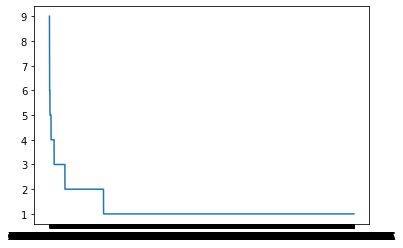

In [6]:
#matplotlib.rcParams['figure.figsize'] = [24 ,4]
print("different UMIs", len(dset.umi_counts()))
plt.plot(dset.umi_counts())


In [7]:
cc=pd.Series(dset.umis['AGTTGTGGTGTG'].seqs).value_counts()
plt.hist([i for i in cc], 'or')



KeyError: 'AGTTGTGGTGTG'

start 10923
Found 3900 corrections
end 7023
start 7023
Found 0 corrections
end 7023


GCCCGGGGACCA    36
TCCCGTGAGCTA    32
TATAGCTTCGCA    30
TTGAGCCCTTCA    27
TATCGTTCTCCA    27
                ..
AAAAGATCTAAC     1
AAAAGATCGCAC     1
AAAAGAGGTCGT     1
AAAAGACAGCTT     1
AAAAGAATCCCT     1
Name: counts, Length: 7023, dtype: int64

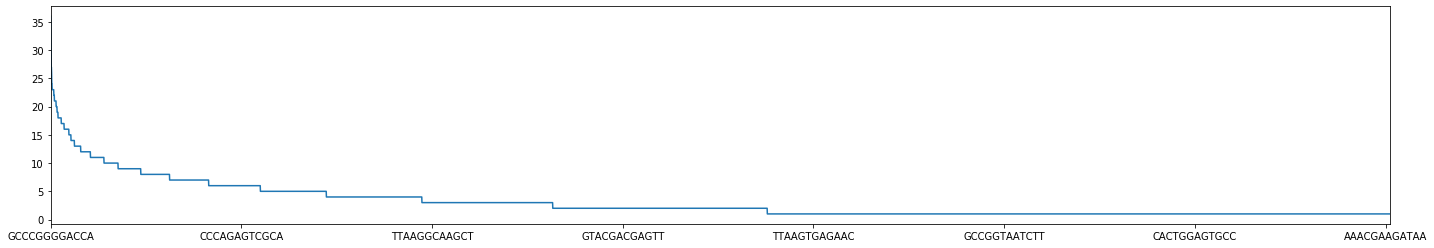

In [14]:
#### Correction 1
dset.correct_umis(errors=1)
matplotlib.rcParams['figure.figsize'] = [24 ,4]
pd.Series(dset.umi_counts()).plot()
dset.umi_counts()

In [8]:
TCCCGTGAGCTA

In [9]:
UM.write_to_fasta("/home/polivar/test.fa", [[str(i)+"_GCCCGGGGACCA",v] for i,v in zip(cc, cc.index)])


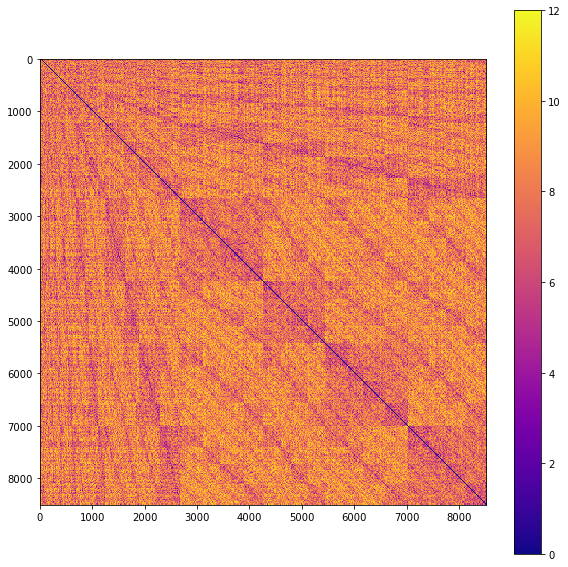

In [56]:
UM.plot_hdist(dset)

In [37]:
print("different UMIs", len(dset.umi_counts()))
matplotlib.rcParams['figure.figsize'] = [24 ,4]
dset.correct_umis(errors=2)
pd.Series(dset.umi_counts()).plot()
print("different UMIs", len(dset.umi_counts()))

different UMIs 7573
start 7573
Found 6191 corrections
end 1382
start 1382
Found 0 corrections
end 1382
different UMIs 1382


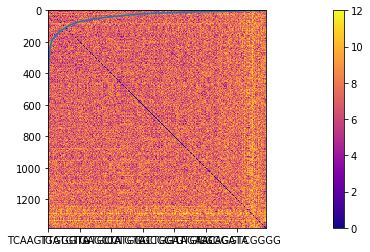

In [37]:
UM.plot_hdist(dset)
#dset.umi_counts()

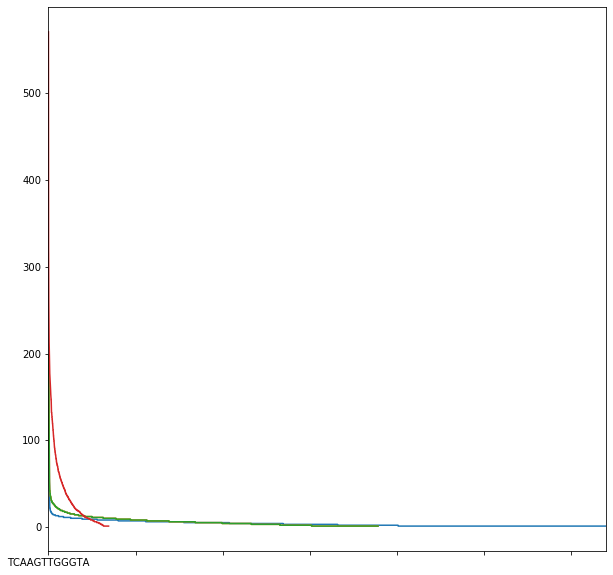

In [38]:
[i.plot() for i in dset.corr_stages]